In [1]:
!pip3 install seaborn

In [2]:
#İmporting libaries

In [3]:
!pip3 install statsmodels

In [4]:
!pip3 install xgboost

In [5]:
!pip3 install sklearn

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import xgboost

from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import AdaBoostRegressor
from xgboost.sklearn import XGBRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import neighbors
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Reading the data

In [8]:
from google.colab import files
uploaded = files.upload()

import io
data = pd.read_csv(io.BytesIO(uploaded['mktmix.csv']))

#data = pd.read_csv("mktmix.csv")

Saving mktmix.csv to mktmix.csv


In [9]:
data.head()

,NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Website_Campaign
0,19564,15.029276,245.0,15.452,NaN,0.000,101.780000,2.28342,NaN
1,19387,15.029276,314.0,16.388,NaN,0.000,76.734000,2.22134,NaN
2,23889,14.585093,324.0,62.692,NaN,0.050,131.590200,2.00604,NaN
3,20055,15.332887,298.0,16.573,NaN,0.000,119.627060,2.19897,NaN
4,20064,15.642632,279.0,41.504,NaN,0.045,103.438118,1.81860,NaN


In [10]:
data = data.rename(columns = { 'NewVolSales' : 'NewVolSales', 
                  'Base_Price' : 'Base_Price', 
                  'Radio ':  'Radio', 
                  'InStore' : 'InStore', 
                  'NewspaperInserts' : 'NewspaperInserts', 
                  'Discount' : 'Discount' , 
                  'TV' : 'TV', 
                  'Stout' : 'Stout', 
                  'Website_Campaign ':  'Web'})

In [ ]:
# Understanding the data

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NewVolSales       104 non-null    int64  
 1   Base_Price        104 non-null    float64
 2   Radio             100 non-null    float64
 3   InStore           104 non-null    float64
 4   NewspaperInserts  6 non-null      object 
 5   Discount          104 non-null    float64
 6   TV                104 non-null    float64
 7   Stout             104 non-null    float64
 8   Web               14 non-null     object 
dtypes: float64(6), int64(1), object(2)
memory usage: 7.4+ KB


In [12]:
data.shape

(104, 9)

In [13]:
data.isnull().sum()

NewVolSales          0
Base_Price           0
Radio                4
InStore              0
NewspaperInserts    98
Discount             0
TV                   0
Stout                0
Web                 90
dtype: int64

In [ ]:
# Preprocessing

In [14]:
data.head()

,NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Web
0,19564,15.029276,245.0,15.452,NaN,0.000,101.780000,2.28342,NaN
1,19387,15.029276,314.0,16.388,NaN,0.000,76.734000,2.22134,NaN
2,23889,14.585093,324.0,62.692,NaN,0.050,131.590200,2.00604,NaN
3,20055,15.332887,298.0,16.573,NaN,0.000,119.627060,2.19897,NaN
4,20064,15.642632,279.0,41.504,NaN,0.045,103.438118,1.81860,NaN


In [15]:
data.isnull().sum()

NewVolSales          0
Base_Price           0
Radio                4
InStore              0
NewspaperInserts    98
Discount             0
TV                   0
Stout                0
Web                 90
dtype: int64

In [16]:
data["Web"] = data["Web"].fillna("other")
data["NewspaperInserts"] = data["NewspaperInserts"].fillna("other")
data["Radio"] = data["Radio"].fillna(data["Radio"].median())

In [17]:
data.isnull().sum()

NewVolSales         0
Base_Price          0
Radio               0
InStore             0
NewspaperInserts    0
Discount            0
TV                  0
Stout               0
Web                 0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NewVolSales       104 non-null    int64  
 1   Base_Price        104 non-null    float64
 2   Radio             104 non-null    float64
 3   InStore           104 non-null    float64
 4   NewspaperInserts  104 non-null    object 
 5   Discount          104 non-null    float64
 6   TV                104 non-null    float64
 7   Stout             104 non-null    float64
 8   Web               104 non-null    object 
dtypes: float64(6), int64(1), object(2)
memory usage: 7.4+ KB


In [18]:
data.describe()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,20171.067308,15.306740,257.528846,32.918567,0.022059,141.009774,2.545966
std,1578.604670,0.528902,85.392805,13.682570,0.027668,42.949231,0.310070
min,17431.000000,13.735724,0.000000,10.782000,0.000000,37.656174,1.818600
25%,19048.750000,15.029276,235.750000,22.183750,0.000000,117.108343,2.316450
50%,19943.500000,15.332887,278.500000,31.161500,0.000000,138.581542,2.502120
75%,20942.750000,15.642632,312.250000,41.079000,0.049423,175.681780,2.814315
max,24944.000000,16.281020,399.000000,68.119000,0.090763,240.291967,3.158620


In [19]:
#Visulations

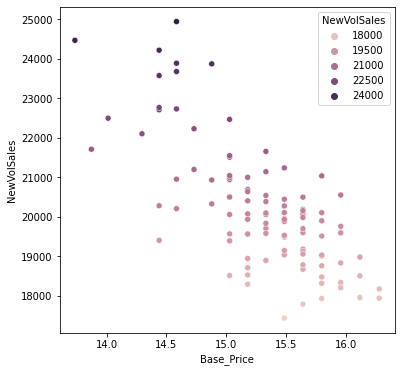

In [20]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=data['Base_Price'],y=data['NewVolSales'],hue=data['NewVolSales'])
plt.xlabel('Base_Price')
plt.ylabel('NewVolSales')
plt.show()

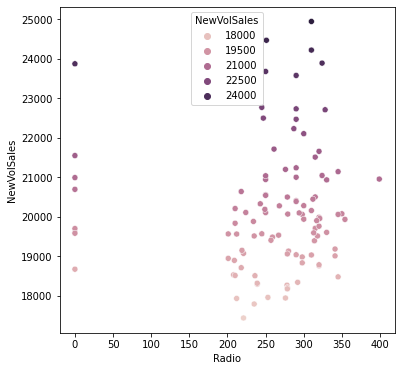

In [21]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=data['Radio'],y=data['NewVolSales'],hue=data['NewVolSales'])
plt.xlabel('Radio')
plt.ylabel('NewVolSales')
plt.show()

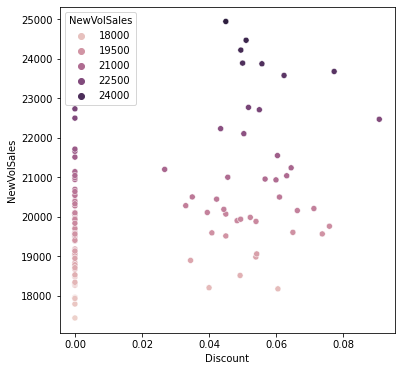

In [23]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=data['Discount'],y=data['NewVolSales'],hue=data['NewVolSales'])
plt.xlabel('Discount')
plt.ylabel('NewVolSales')
plt.show()

<function matplotlib.pyplot.show>

<Figure size 360x360 with 0 Axes>

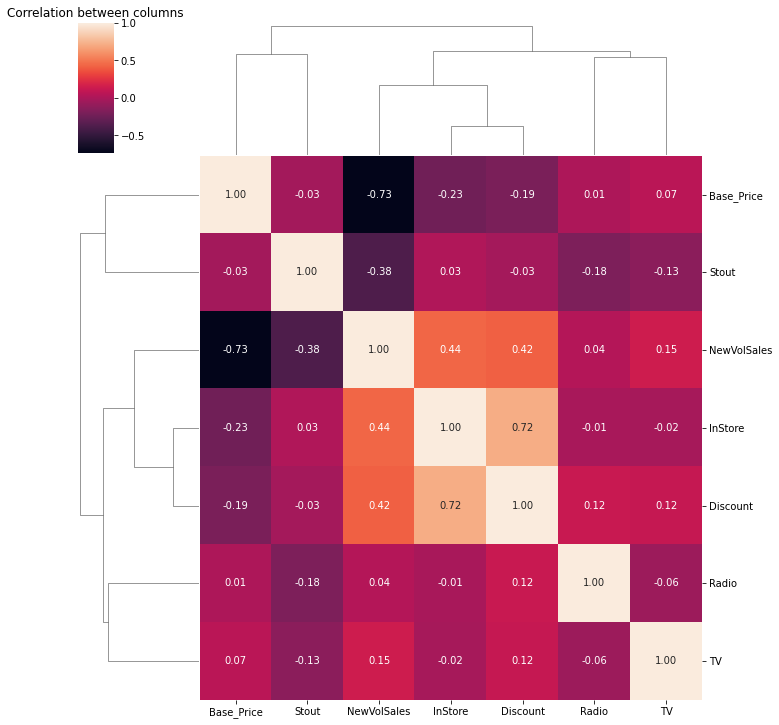

In [24]:
corr_matrix = data.corr()
plt.figure(figsize=(5,5))
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation between columns")
plt.show

In [25]:
# Editing categorical variables

In [26]:
cat_col = ["Web","NewspaperInserts"]
data = pd.get_dummies(data, columns = cat_col)

In [27]:
data = data.drop(["Web_other","NewspaperInserts_other"], axis = 1)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NewVolSales              104 non-null    int64  
 1   Base_Price               104 non-null    float64
 2   Radio                    104 non-null    float64
 3   InStore                  104 non-null    float64
 4   Discount                 104 non-null    float64
 5   TV                       104 non-null    float64
 6   Stout                    104 non-null    float64
 7   Web_Facebook             104 non-null    uint8  
 8   Web_Twitter              104 non-null    uint8  
 9   Web_Website Campaign     104 non-null    uint8  
 10  NewspaperInserts_Insert  104 non-null    uint8  
dtypes: float64(6), int64(1), uint8(4)
memory usage: 6.2 KB


In [29]:
data.head()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout,Web_Facebook,Web_Twitter,Web_Website Campaign,NewspaperInserts_Insert
0,19564,15.029276,245.0,15.452,0.000,101.780000,2.28342,0,0,0,0
1,19387,15.029276,314.0,16.388,0.000,76.734000,2.22134,0,0,0,0
2,23889,14.585093,324.0,62.692,0.050,131.590200,2.00604,0,0,0,0
3,20055,15.332887,298.0,16.573,0.000,119.627060,2.19897,0,0,0,0
4,20064,15.642632,279.0,41.504,0.045,103.438118,1.81860,0,0,0,0


In [ ]:
# Handling outliers 

In [30]:
chechk_outliers = ["Base_Price","Radio","InStore","Discount","TV","Stout"]

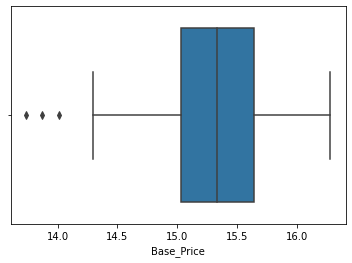

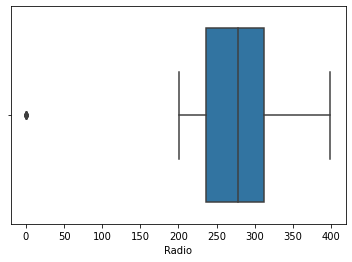

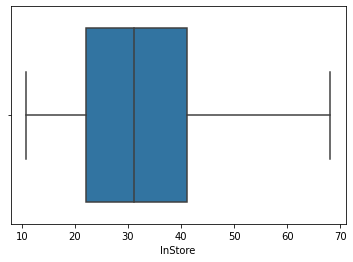

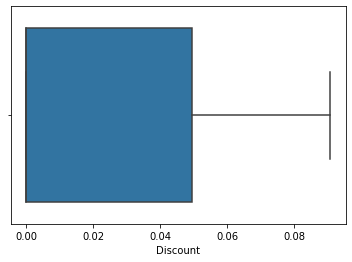

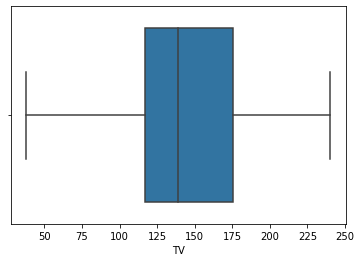

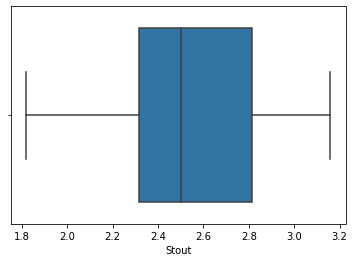

In [31]:
for c in chechk_outliers:
    plt.figure()
    sns.boxplot(x = c, data = data, orient = "v")

In [ ]:
# #

In [32]:
outliers = ["Radio","Base_Price"]

In [33]:
def treat_outlier(x):
    q5 = np.percentile(x,5)
    q25= np.percentile(x,25)
    q75= np.percentile(x,75)
    up_trend=np.percentile(x,95)
    IQR = q75-q25
    low_level = q25-(1.5*IQR)
    up_level = q75+(1.5*IQR)
    
    return x.apply(lambda y: up_trend if y> up_level else y).apply(lambda y: q5 if y < low_level else y)

In [34]:
for i in data[outliers]:
    data[i]=treat_outlier(data[i])

In [ ]:
# Modelling 

In [35]:
x = data.drop(["NewVolSales"],axis = 1)
y = data.NewVolSales

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 0)

In [37]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [38]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
x_train.columns = x.columns
x_test.columns = x.columns

In [39]:
svr = SVR(kernel = "rbf")
ada = AdaBoostRegressor()
xgb = XGBRegressor()
rfr = RandomForestRegressor()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
knn = neighbors.KNeighborsRegressor()
mlp = MLPRegressor()
names = ["SVR","AdaBoostRegressor","XGBRegressor","RandomForestRegressor","DecisionTreeRegressor",
        "GradientBoostingRegressor","KNeighborsRegressor","MLPRegressor"]
models = [svr, ada, xgb, rfr, dtr, gbr, knn, mlp]

In [40]:
for name, clf in zip(names, models):
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        mse = mean_squared_error(y_test, y_pred) 
        print("{}: mse score: {}".format(name, mse))
        r2 = r2_score(y_test, y_pred)
        print("{}: r2 score: {}".format(name, r2))
        mae = mean_absolute_error(y_test, y_pred)
        print("{}: mea score: {}".format(name, mae))
        mape = np.mean(abs((y_pred-y_test)/y_test))*100
        print("{}: mape :{}".format(name,mape))
        print("\n")

SVR: mse score: 4514270.289287768
SVR: r2 score: -0.2136858147814782
SVR: mea score: 1618.370475607868
SVR: mape :7.424368875771746


AdaBoostRegressor: mse score: 906335.3610655663
AdaBoostRegressor: r2 score: 0.7563268699771013
AdaBoostRegressor: mea score: 695.8072961765713
AdaBoostRegressor: mape :3.306202576759729


[10:52:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor: mse score: 651887.171786717
XGBRegressor: r2 score: 0.8247366323826429
XGBRegressor: mea score: 655.1266741071429
XGBRegressor: mape :3.158407084573736


RandomForestRegressor: mse score: 669195.1226523811
RandomForestRegressor: r2 score: 0.820083296826188
RandomForestRegressor: mea score: 605.4242857142857
RandomForestRegressor: mape :2.901250658552926


DecisionTreeRegressor: mse score: 1123534.142857143
DecisionTreeRegressor: r2 score: 0.6979318108523087
DecisionTreeRegressor: mea score: 832.7142857142857
DecisionTreeRegressor:

In [41]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x_train)

In [42]:
lin_reg = LinearRegression()
lin_reg = lin_reg.fit(X_poly, y_train)

In [43]:
y_pred = lin_reg.predict(poly_reg.transform(x_test))

In [44]:
mse = mean_squared_error(y_test, y_pred)
print("MSE score",mse)
r2 = r2_score(y_test, y_pred)
print("r2 score",r2)
mea = mean_absolute_error(y_test, y_pred)
print("MAE score",mea)

MSE score 1231044.1768676755
r2 score 0.6690271607397775
MAE score 870.1663344047809


In [45]:
parametresGrid_rfr = {"max_depth":[1,3,5,8,10],
                 "max_features":[2,5,10],
                 "min_samples_split":[5,10,20],
                 "n_estimators":[50,100,150,200]}

In [46]:
rfrr = GridSearchCV(rfr, parametresGrid_rfr, cv = 10, scoring="neg_mean_squared_error", refit = True,
                  n_jobs = -1, verbose = 2)

In [47]:
rfrr.fit(x_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  4.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [48]:
rfrr.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [49]:
y_pred = rfrr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Random Forest Mse score : ", mse)
r2 = r2_score(y_test, y_pred)
print("Random Forest R2 score",r2)
mape = np.mean(abs((y_pred-y_test)/y_test))*100
print("Random Forest mape score",mape)

Random Forest Mse score :  827693.7517687966
Random Forest R2 score 0.7774700890443264
Random Forest mape score 3.5106154046251627


In [50]:
parametresGrid_gbr = {"max_depth":[3,5,8,10],
                 "max_features":[2,5,10],
                 "min_samples_split":[10,50,100],
                 "n_estimators":[100,200,500,1000]}

In [51]:
gbrr = GridSearchCV(gbr, parametresGrid_gbr, cv = 10, scoring="neg_mean_squared_error", refit = True,
                  n_jobs = -1, verbose = 2)

In [52]:
gbrr.fit(x_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 262 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  2.5min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_...
                            

In [53]:
gbrr.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=5, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=50,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [54]:
y_pred = gbrr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Gradient Boost Mse score : ", mse)
r2 = r2_score(y_test, y_pred)
print("Gradient Boost R2 score",r2)
mape = np.mean(abs((y_pred-y_test)/y_test))*100
print("Gradient Boost mape score",mape)

Gradient Boost Mse score :  621499.1085505974
Gradient Boost R2 score 0.8329066264071212
Gradient Boost mape score 3.374204057212171


In [55]:
parametresGrid_xgb = {"nthread":[4],"objective":["reg:linear"],
                 "learnin_rate":[0.03,0.05,0.07], "max_depth" : [5,6,7],
                 "min_child_weight":[4,5,6], "silent":[1],
                 "subsample":[0.7], "colsample_bytree":[0.7],
                 "n_estimators":[100,500,1000]}

In [56]:
xgbr = GridSearchCV(xgb, parametresGrid_xgb, cv = 10, scoring="neg_mean_squared_error", refit = True,
                n_jobs = -1, verbose = 2)

In [57]:
xgbr.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 375 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 658 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  3.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg...
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.7],
                         'learnin_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4, 5, 6],
                         'n

In [58]:
xgbr.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learnin_rate=0.03, learning_rate=0.1,
             max_delta_step=0, max_depth=7, min_child_weight=4, missing=None,
             n_estimators=100, n_jobs=1, nthread=4, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=1, subsample=0.7, verbosity=1)

In [59]:
xgbr = XGBRegressor(colsample_bytree=0.7, learnin_rate=0.03, max_depth=7,
             min_child_weight=4, nthread=4, silent=1, subsample=0.7).fit(x_train, y_train)

In [60]:
y_pred = xgbr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("XGBoost Mse score : ", mse)
r2 = r2_score(y_test, y_pred)
print("XGBoost R2 score",r2)
mape = np.mean(abs((y_pred-y_test)/y_test))*100
print("XGBoost mape score",mape)

XGBoost Mse score :  544149.6867557707
XGBoost R2 score 0.8537024339237202
XGBoost mape score 2.8919764391273075


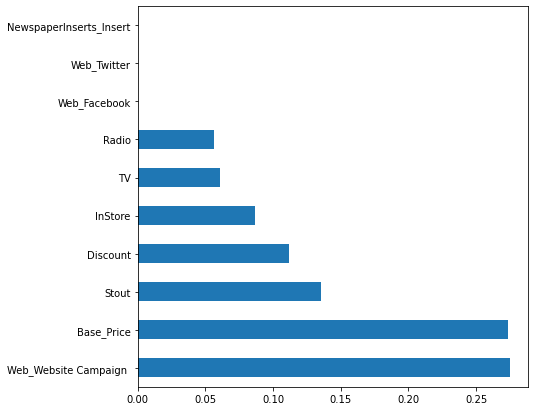

In [61]:
feat_importances = pd.Series(xgbr.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh',figsize=(7,7))

In [62]:
xgbr.feature_importances_

array([0.27359176, 0.05622134, 0.08695688, 0.11189445, 0.06120925,
       0.13536787, 0.        , 0.        , 0.27475846, 0.        ],
      dtype=float32)

In [63]:
y_pred = xgbr.predict(x_train)

In [64]:
model_xgb = sm.ols(formula="y_pred~x_train", data=x_train).fit()
print(model_xgb.summary())

                            OLS Regression Results                            
Dep. Variable:                 y_pred   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     37.18
Date:                Wed, 23 Jun 2021   Prob (F-statistic):           1.68e-24
Time:                        11:09:07   Log-Likelihood:                -640.66
No. Observations:                  83   AIC:                             1303.
Df Residuals:                      72   BIC:                             1330.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.001e+04     64.169    311.844      0.0

In [114]:
 def get_params(x,y):
        model = sm.ols(formula="y~x", data=x).fit()
        coef = model.params
        coef = coef[1:]
        return coef

In [115]:
def elasticty(x,y,get_params):
      x_mean = x.mean()
      elasticity = np.column_stack([coef, mean]).tolist()
      elasticity = pd.DataFrame(elasticity)
      elasticity.columns = (["Coeffiecents","Mean"])
      elasticity["elasticty_value"] = elasticity["Coeffiecents"]*(elasticity["Mean"]/y.mean())
      elasticity.head(20)
      return elasticity

In [116]:
elasticty_data = elasticty(x,y,coef)
elasticty_data

,Coeffiecents,Mean,elasticty_value
0,-1028.631219,15.323059,-0.781405
1,-55.284830,257.528846,-0.705835
2,392.891500,32.918567,0.641187
3,132.642642,0.022059,0.000145
4,133.275582,141.009774,0.931689
5,-523.883557,2.545966,-0.066124
6,81.907806,0.038462,0.000156
7,34.925065,0.038462,0.000067
8,-309.265917,0.057692,-0.000885
9,57.230914,0.057692,0.000164


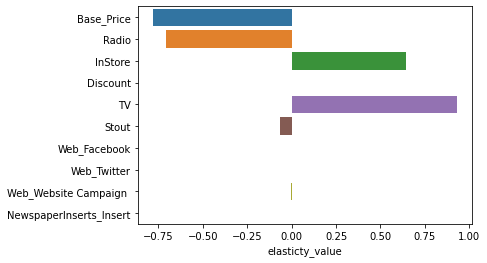

In [111]:
sns.barplot(x=elasticty_data["elasticty_value"],
            y=x.columns, data=elasticty_data)
plt.show()